# Vehicle Price Prediction

## Project Objective
To develop a machine learning model that accurately predicts the price of a vehicle based on its features such as brand, model, year, fuel type, transmission, mileage, and engine capacity, enabling better decision-making for buyers, sellers, and dealers in the used vehicle market.

The dataset used in this project is from [Kaggle](https://www.kaggle.com/datasets/khwaishsaxena/vehicle-price-prediction-dataset/data). The dataset consists of 17 columns and 1002 rows.

Below is the description of each column in the dataset

* name: The full name of the vehicle, including make, model, and trim.
* description: A brief description of the vehicle, often including key features and selling points.
* make: The manufacturer of the vehicle (e.g., Ford, Toyota, BMW).
* model: The model name of the vehicle.
* year: The year the vehicle was manufactured.
* price: The price of the vehicle in USD.
* engine: Details about the engine, including type and specifications.
* cylinders: The number of cylinders in the vehicle's engine.
* fuel: The type of fuel used by the vehicle (e.g., Gasoline, Diesel, Electric).
* mileage: The mileage of the vehicle, typically in miles.
* transmission: The type of transmission (e.g., Automatic, Manual).
* trim: The trim level of the vehicle, indicating different feature sets or packages.
* body: The body style of the vehicle (e.g., SUV, Sedan, Pickup Truck)
* doors: The number of doors on the vehicle.
* exterior_color: The exterior color of the vehicle.
* interior_color: The interior color of the vehicle.
* drivetrain: The drivetrain of the vehicle (e.g., All-wheel Drive, Front-wheel Drive

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import html  # for cleaning html entities

# set custom style for plotting
plt.style.use("seaborn-v0_8-darkgrid")

# set to display max column
pd.set_option("display.max_columns", None)

In [2]:
# Read data into pandas dataframe
df = pd.read_csv("Vehicle Price.csv")
print("Data read into pandas")

Data read into pandas


In [3]:
# display first five rows
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [4]:
print(df.shape)
print("")
df.info()

(1002, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(

In [5]:
print("Number of null values in each column")
display(df.isnull().sum())
print("")
print("Percentage of null values in each column")
display((df.isnull().sum()) / (df.shape[0]) * 100)

Number of null values in each column


name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64


Percentage of null values in each column


name               0.000000
description        5.588822
make               0.000000
model              0.000000
year               0.000000
price              2.295409
engine             0.199601
cylinders         10.479042
fuel               0.698603
mileage            3.393214
transmission       0.199601
trim               0.099800
body               0.299401
doors              0.698603
exterior_color     0.499002
interior_color     3.792415
drivetrain         0.000000
dtype: float64

In [6]:
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 24


In [7]:
print("Number of Unique Values in each column")
df.nunique()

Number of Unique Values in each column


name              358
description       761
make               28
model             153
year                3
price             859
engine            100
cylinders           5
fuel                7
mileage            95
transmission       38
trim              197
body                8
doors               4
exterior_color    263
interior_color     91
drivetrain          4
dtype: int64

In [8]:
# Basic statistics
df.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [9]:
# Basic statistics of column with object datatype
df.describe(include="object")

,name,description,make,model,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain
count,1002,946,1002,1002,1000,995,1000,1001,999,997,964,1002
unique,358,761,28,153,100,7,38,197,8,263,91,4
top,2023 Dodge Durango Pursuit,\n \n .\n \n,Jeep,Hornet,16V GDI DOHC Turbo,Gasoline,8-Speed Automatic,Limited,SUV,Bright White Clearcoat,Black,All-wheel Drive
freq,33,13,194,65,130,664,325,69,704,81,510,461


Inspection
* Price column distribution is skewed to the right condisdering the mean higher than the median. The data points are widely spread
* Mileage column distribution is extremely skewed
* Jeep is the top car brand in the dataset with 194 records
* Popular fuel type is Gasoline
* Most vehicle body type in the dataset are SUV's

## Data Cleaning/Wrangling

In [10]:
# Drop duplicate
df.drop_duplicates(inplace=True, ignore_index=True)

# check the shape of the dataset
df.shape

(978, 17)

Price column is our target, but it has 23 null values. It's best we drop row with null value in price column

In [11]:
# drop rows with nan values in price column
df.dropna(subset=["price"], axis=0, inplace=True, ignore_index=True)

df.shape

(955, 17)

In [12]:
# change doors data type to object
df["doors"] = df["doors"].astype("object")

df.dtypes

name               object
description        object
make               object
model              object
year                int64
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors              object
exterior_color     object
interior_color     object
drivetrain         object
dtype: object

In [13]:
df.isnull().sum()

name                0
description        52
make                0
model               0
year                0
price               0
engine              2
cylinders         100
fuel                7
mileage            32
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     37
drivetrain          0
dtype: int64

In [14]:
# drop columns
df.drop(columns=["name", "description", "engine"], inplace=True)

In [15]:
numerical_col = df.select_dtypes(include="number").columns
categorical_col = df.select_dtypes(include="object").columns

# fill null values in numerical columns
for col in numerical_col:
    if df[col].isnull().any():
        col_mean = round(df[col].mean(), 1)
        df[col] = df[col].fillna(col_mean)

# fill null values in categorical columns
for col in categorical_col:
    if df[col].isnull().any():
        col_mode = df[col].mode()[0]
        df[col] = df[col].fillna(col_mode)

C:\Users\George\AppData\Local\Temp\ipykernel_11816\3260497721.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(col_mode)


In [16]:
# Clean HTML Entities from columns
df = df.map(lambda x: html.unescape(x) if isinstance(x, str) else x)

# Exploratory Data Analysis

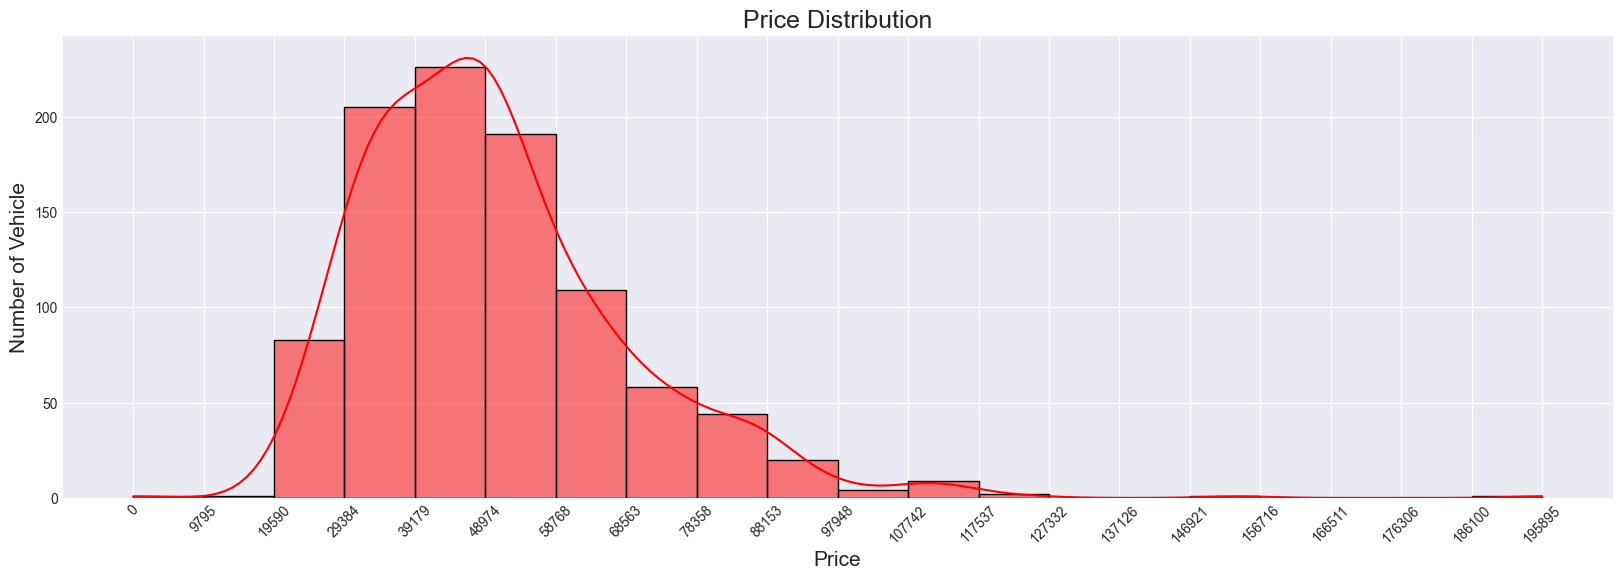

In [17]:
# price distribution
counts, bin_edges = np.histogram(df["price"], bins=20)
plt.figure(figsize=(20, 6))
sns.histplot(x="price", kde=True, data=df, bins=bin_edges, color="red")
plt.title("Price Distribution", size=18)
plt.xlabel("Price", size=15)
plt.ylabel("Number of Vehicle", size=15)
plt.xticks(bin_edges, rotation=45)

plt.show()

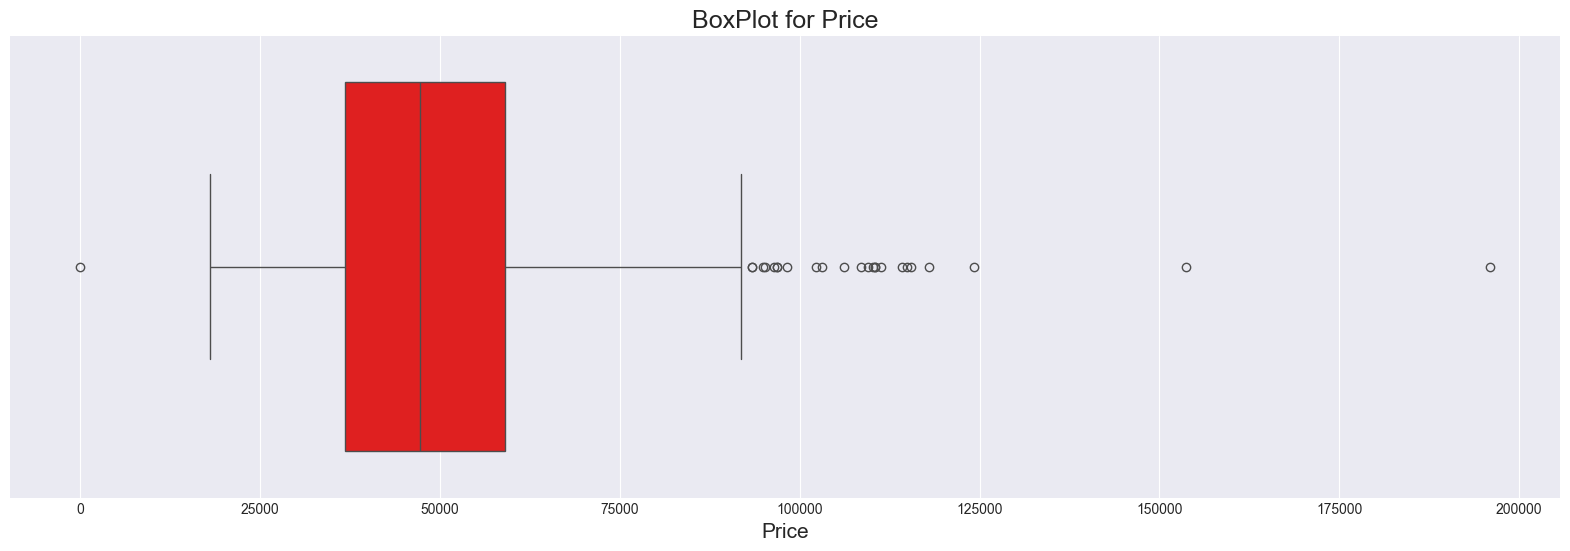

In [18]:
# Boxplot to check outliers
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x="price", color="red")
plt.title("BoxPlot for Price", size=18)
plt.xlabel("Price", size=15)

plt.show()

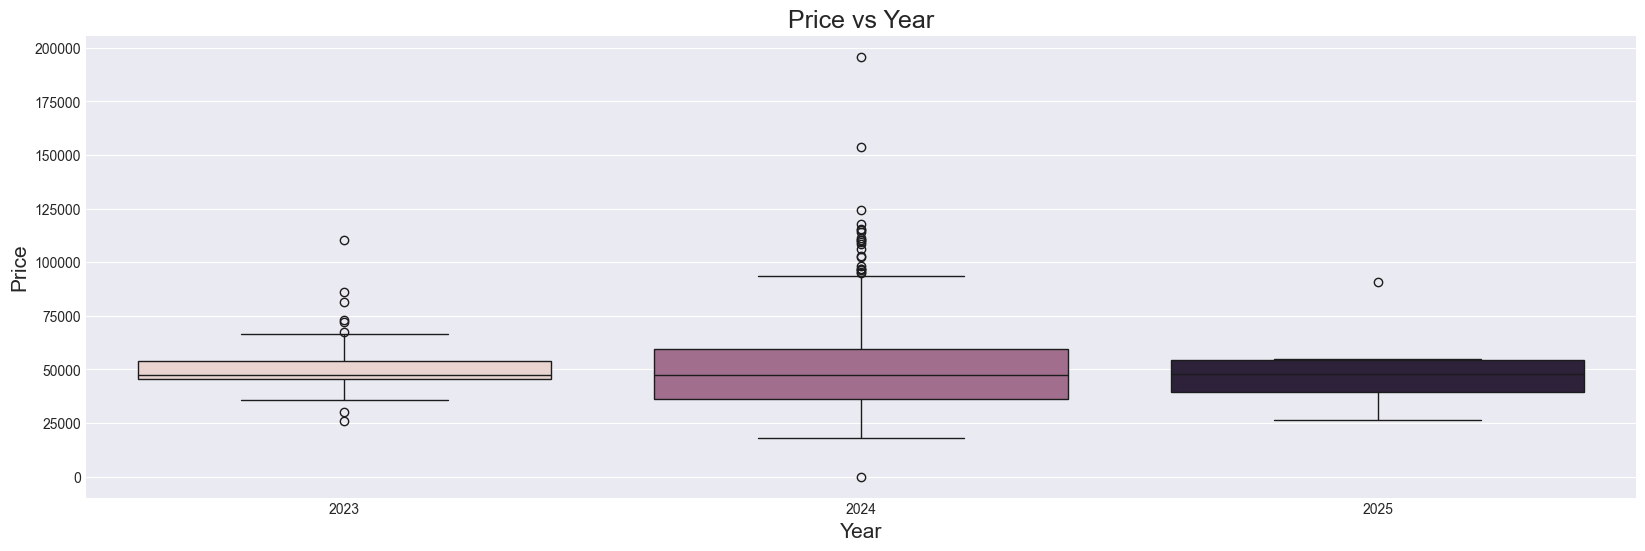

In [19]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df, x="year", y="price", hue="year", legend=False)
plt.title("Price vs Year", size=18)
plt.xlabel("Year", size=15)
plt.ylabel("Price", size=15)

plt.show()

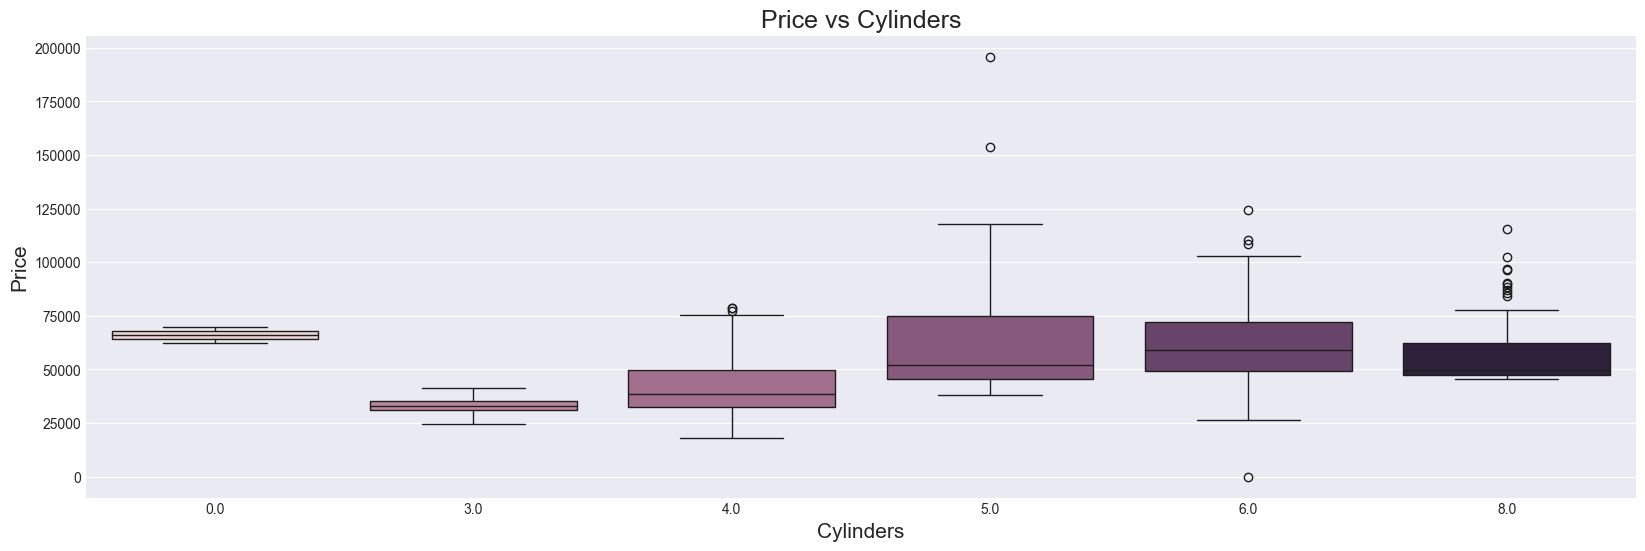

In [20]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df, x="cylinders", y="price", hue="cylinders", legend=False)
plt.title("Price vs Cylinders", size=18)
plt.xlabel("Cylinders", size=15)
plt.ylabel("Price", size=15)

plt.show()

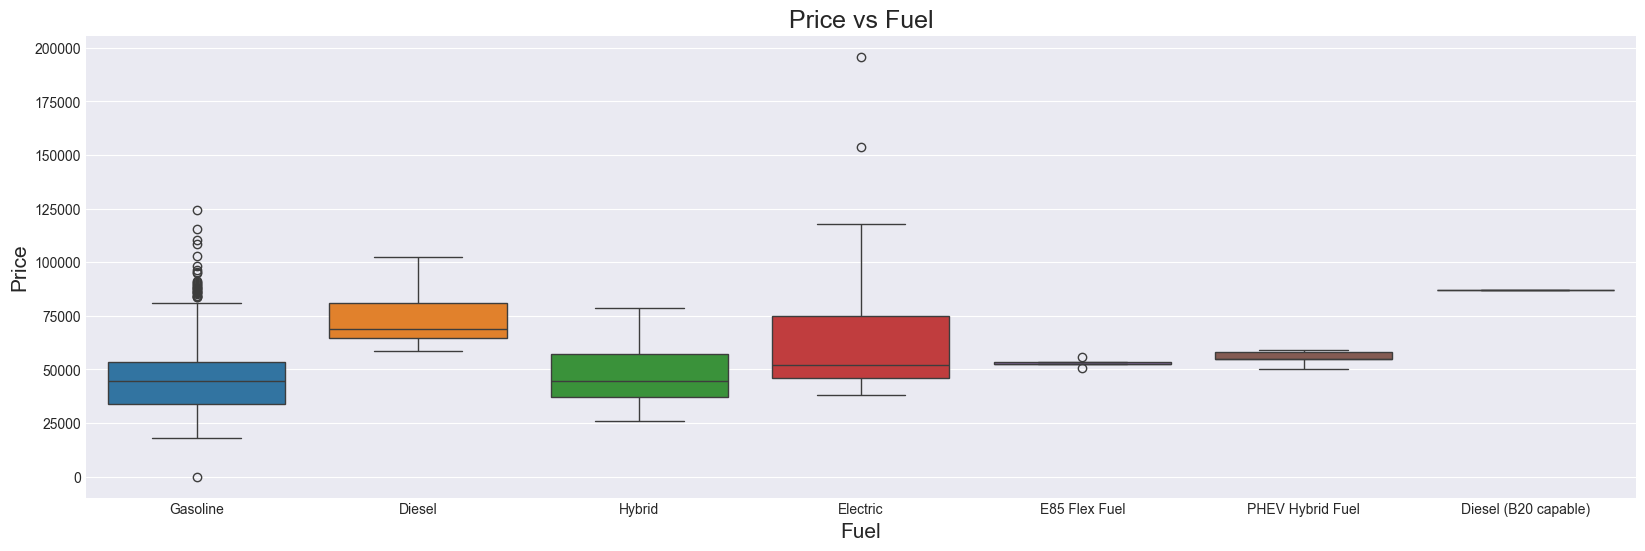

In [21]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df, x="fuel", y="price", hue="fuel", legend=False)
plt.title("Price vs Fuel", size=18)
plt.xlabel("Fuel", size=15)
plt.ylabel("Price", size=15)

plt.show()

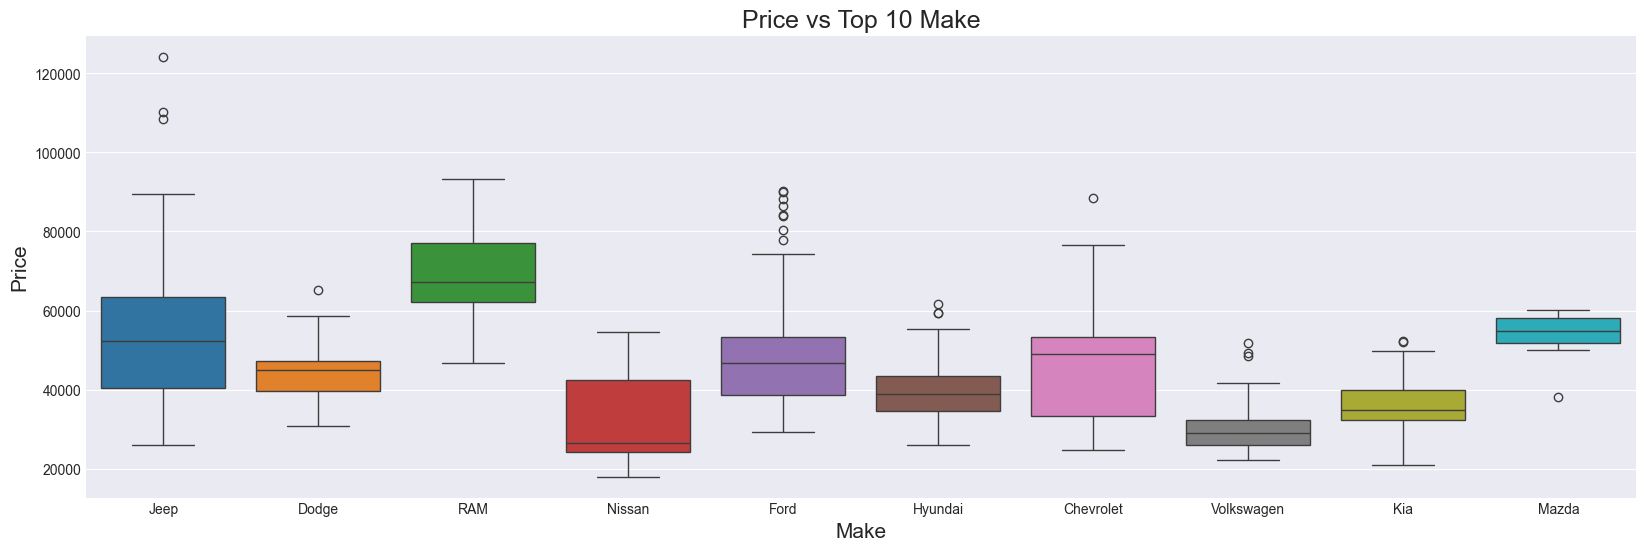

In [22]:
# top 10 car make
top_make = df["make"].value_counts().nlargest(10).index
make_df = df[df["make"].isin(top_make)]

plt.figure(figsize=(20,6))
sns.boxplot(data=make_df, x="make", y="price", hue="make", legend=False)
plt.title("Price vs Top 10 Make", size=18)
plt.xlabel("Make", size=15)
plt.ylabel("Price", size=15)

plt.show()

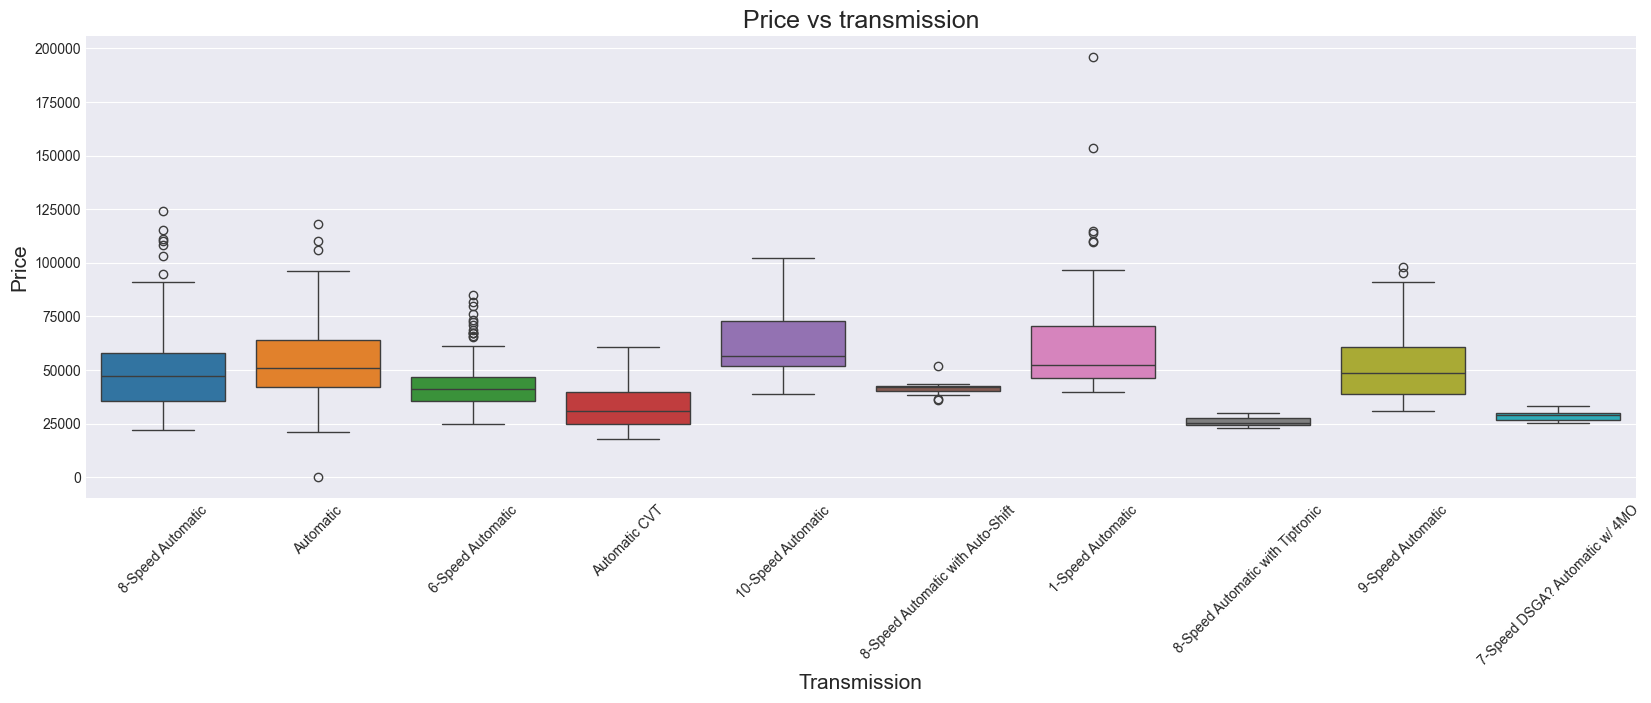

In [23]:
# top 10 transmission
top_transmission = df["transmission"].value_counts().nlargest(10).index
transmission_df = df[df["transmission"].isin(top_transmission)]

plt.figure(figsize=(20,6))
sns.boxplot(data=transmission_df, x="transmission", y="price", hue="transmission", legend=False)
plt.title("Price vs transmission", size=18)
plt.xlabel("Transmission", size=15)
plt.ylabel("Price", size=15)
plt.xticks(rotation=45)

plt.show()

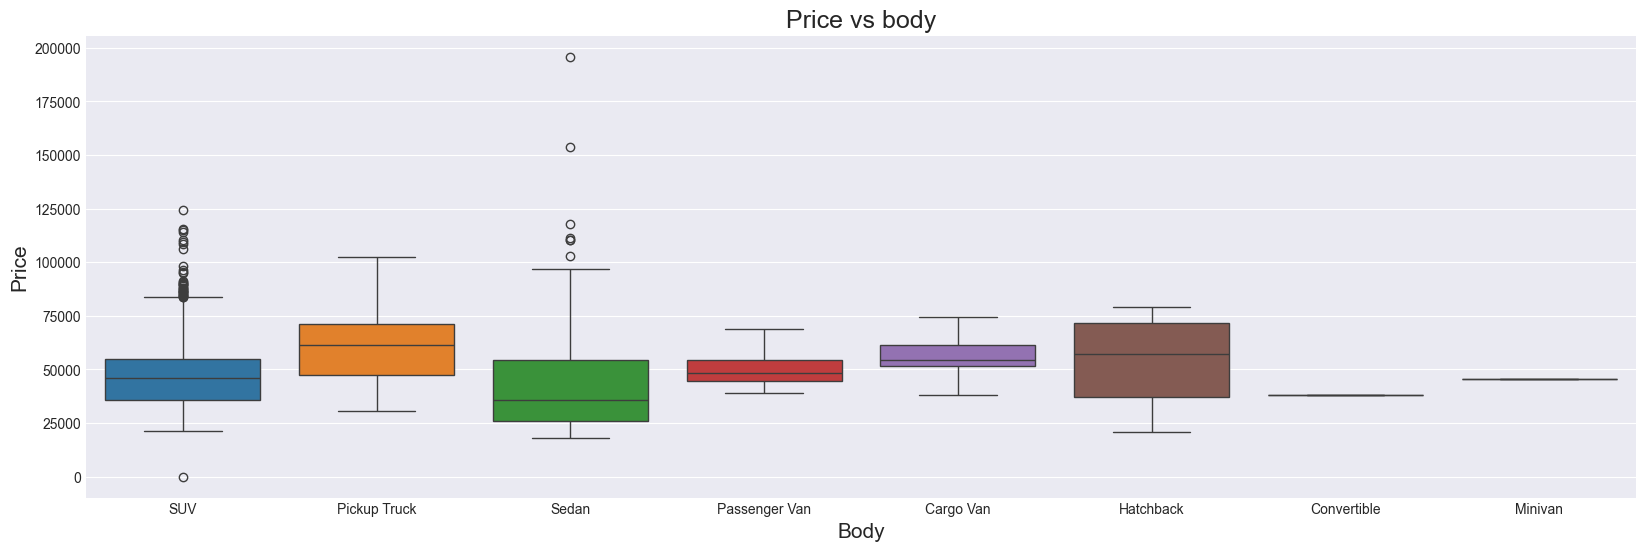

In [24]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df, x="body", y="price", hue="body", legend=False)
plt.title("Price vs body", size=18)
plt.xlabel("Body", size=15)
plt.ylabel("Price", size=15)

plt.show()

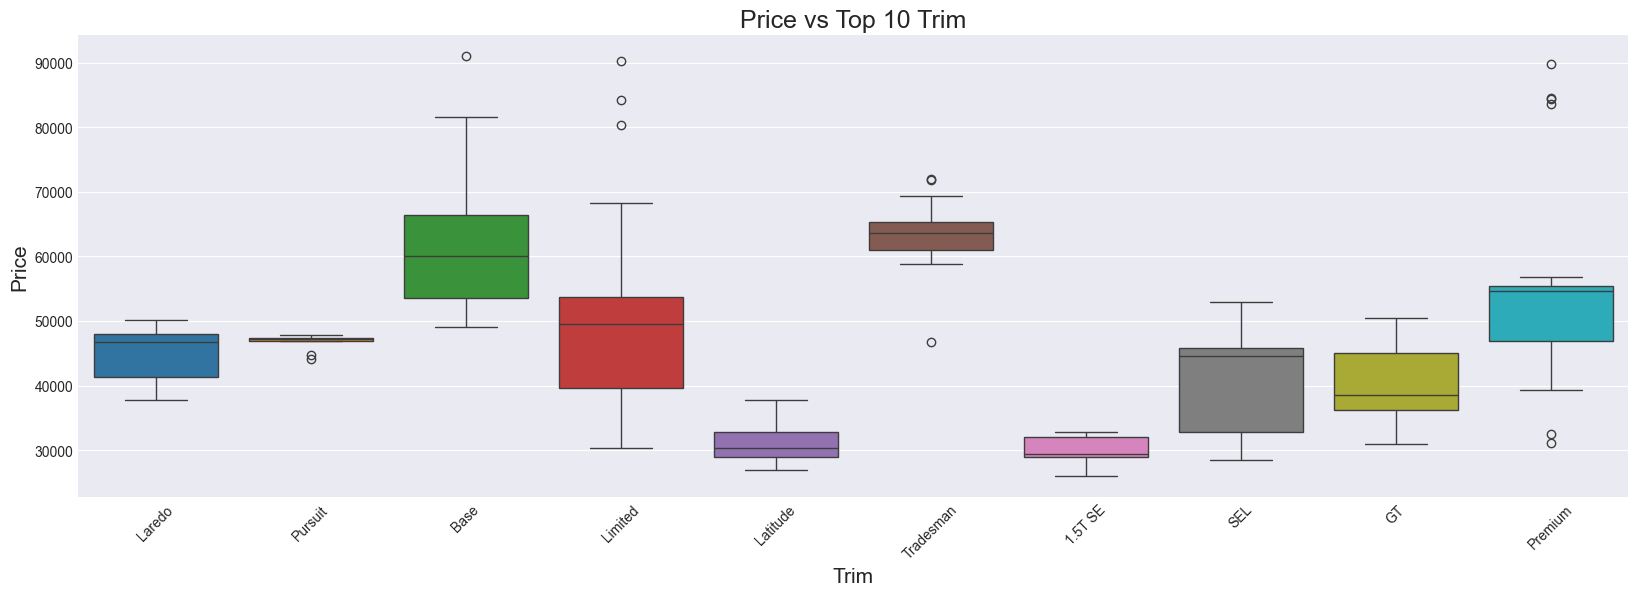

In [25]:
top_trim = df["trim"].value_counts().nlargest(10).index
trim_df = df[df["trim"].isin(top_trim)]

plt.figure(figsize=(20,6))
sns.boxplot(data=trim_df, x="trim", y="price", hue="trim", legend=False)
plt.title("Price vs Top 10 Trim", size=18)
plt.xlabel("Trim", size=15)
plt.ylabel("Price", size=15)
plt.xticks(rotation=45)

plt.show()

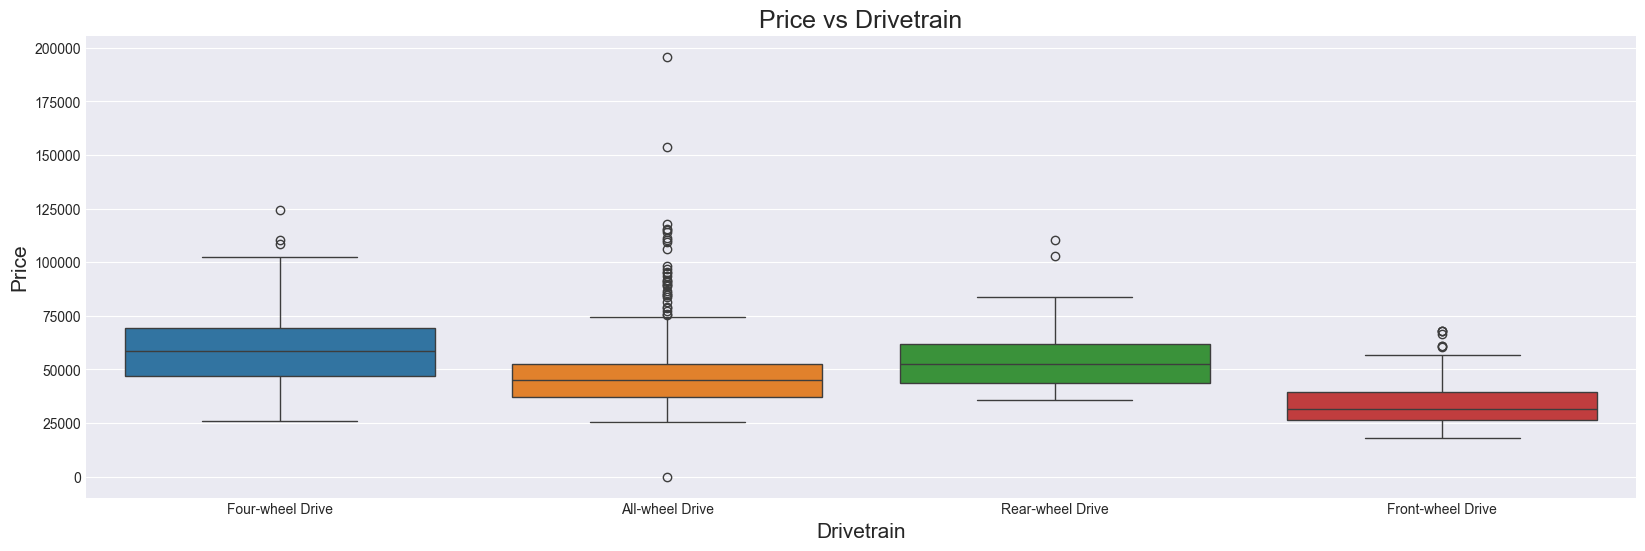

In [26]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x="drivetrain", y="price", hue="drivetrain", legend=False)
plt.title("Price vs Drivetrain", size=18)
plt.xlabel("Drivetrain", size=15)
plt.ylabel("Price", size=15)

plt.show()

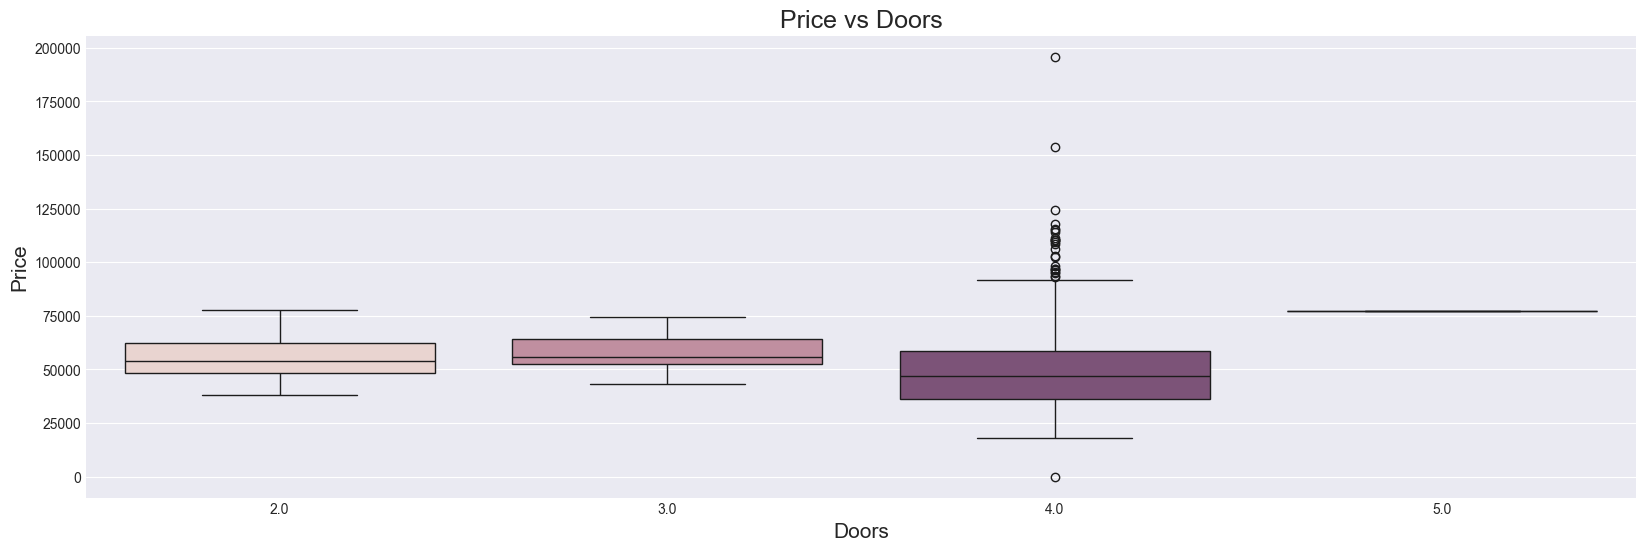

In [27]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x="doors", y="price", hue="doors", legend=False)
plt.title("Price vs Doors", size=18)
plt.xlabel("Doors", size=15)
plt.ylabel("Price", size=15)

plt.show()

## One-way ANOVA to test if the mean of the categorical columns are statically significant

In [28]:
# ANOVA test for each categorical column
anova_test = []
for col in categorical_col:
    x = df.groupby(col)["price"].apply(list)
    group = x.values

    # run ANOVA 
    f_stat, p_val = f_oneway(*group)

    anova_test.append({
        "column_name": col,
        "f_stat": f_stat,
        "p_value": p_val
    })

anova_df = pd.DataFrame(anova_test)
anova_df.sort_values(by="p_value")

,column_name,f_stat,p_value
1,model,48.863578,4.632359e-320
4,trim,17.331604,4.711412e-186
0,make,31.464078,1.751362e-111
7,exterior_color,4.037695,1.516454e-48
2,fuel,38.038438,1.699585e-41
9,drivetrain,64.731389,4.325904e-38
8,interior_color,4.317263,6.327272e-30
3,transmission,6.547391,1.091819e-27
5,body,9.503040,1.932798e-11
6,doors,3.003521,2.965398e-02


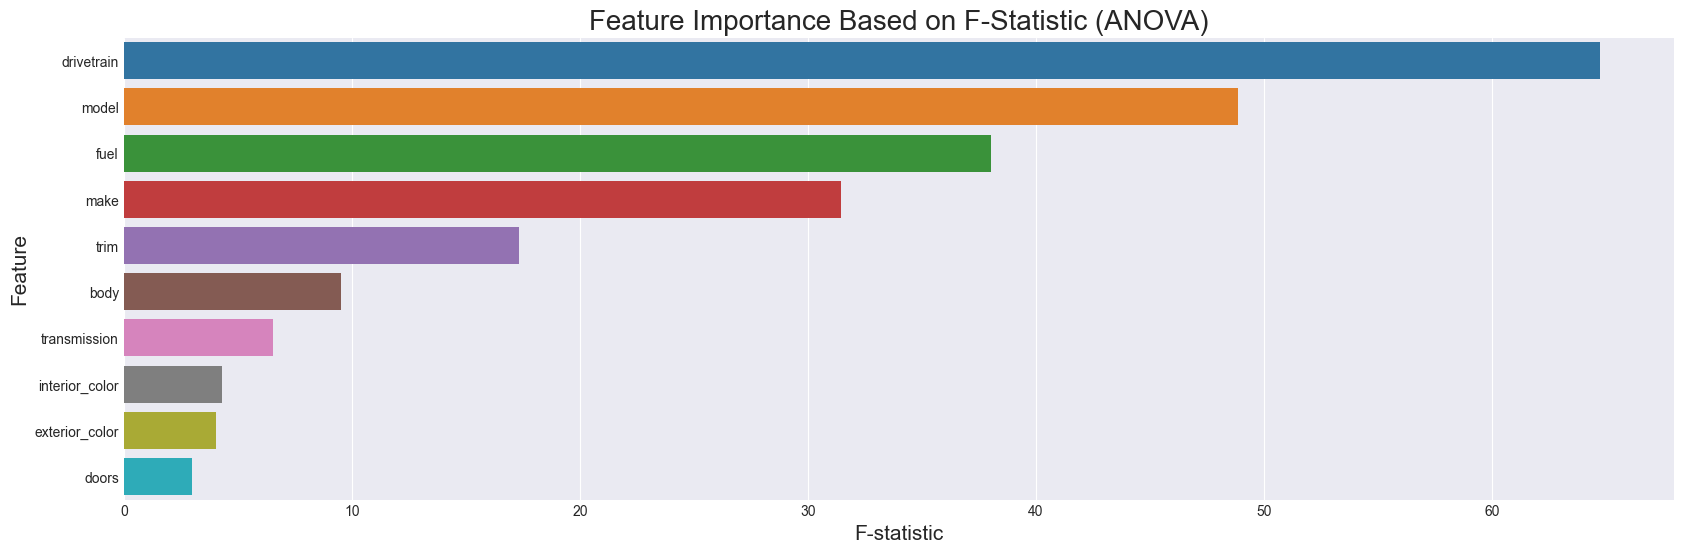

In [29]:
# sort values by f_stat
f_sorted = anova_df.sort_values(by='f_stat', ascending=False)

# Plot
plt.figure(figsize=(20, 6))
sns.barplot(x='f_stat', y='column_name', data=f_sorted, hue="column_name", legend=False)
plt.title('Feature Importance Based on F-Statistic (ANOVA)', size= 20)
plt.xlabel('F-statistic', size=15)
plt.ylabel('Feature', size=15)

plt.show()

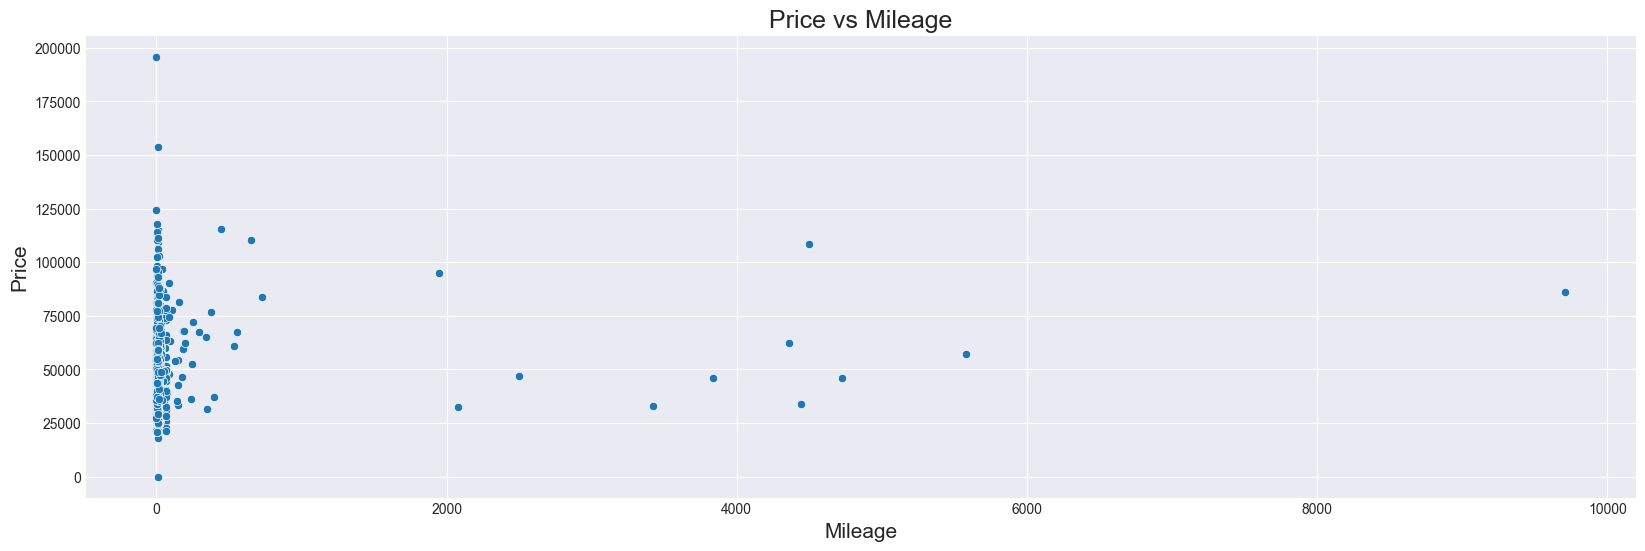

In [30]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=df, x="mileage", y="price")
plt.title("Price vs Mileage", size=18)
plt.xlabel("Mileage", size=15)
plt.ylabel("Price", size=15)

plt.show()

,year,price,cylinders,mileage
year,1.000000,0.004594,-0.277748,-0.096461
price,0.004594,1.000000,0.425586,0.077591
cylinders,-0.277748,0.425586,1.000000,0.030278
mileage,-0.096461,0.077591,0.030278,1.000000


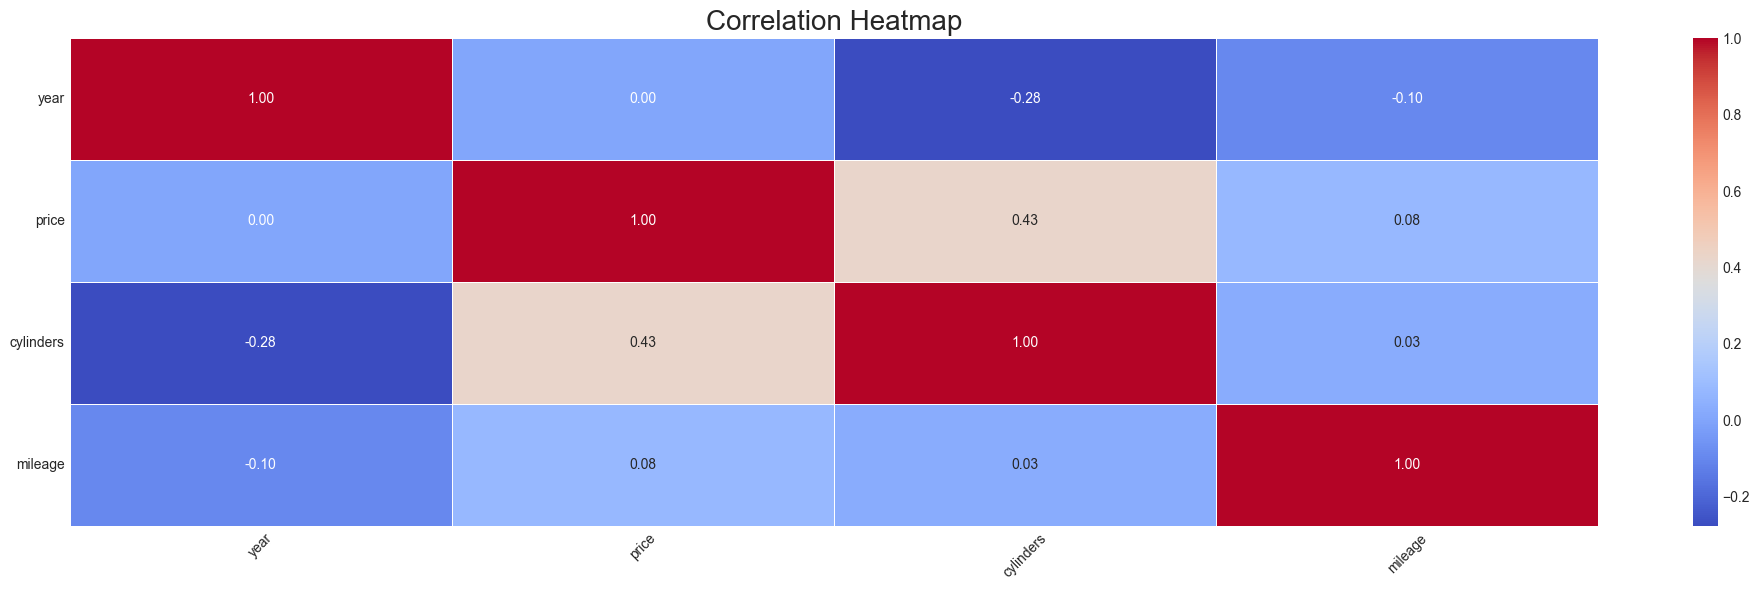

In [31]:
# correlation heatmap for numerical variables
corr = df[numerical_col].corr()
display(corr)

plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

Log_mileage correlation with Price: 0.08612110029112194



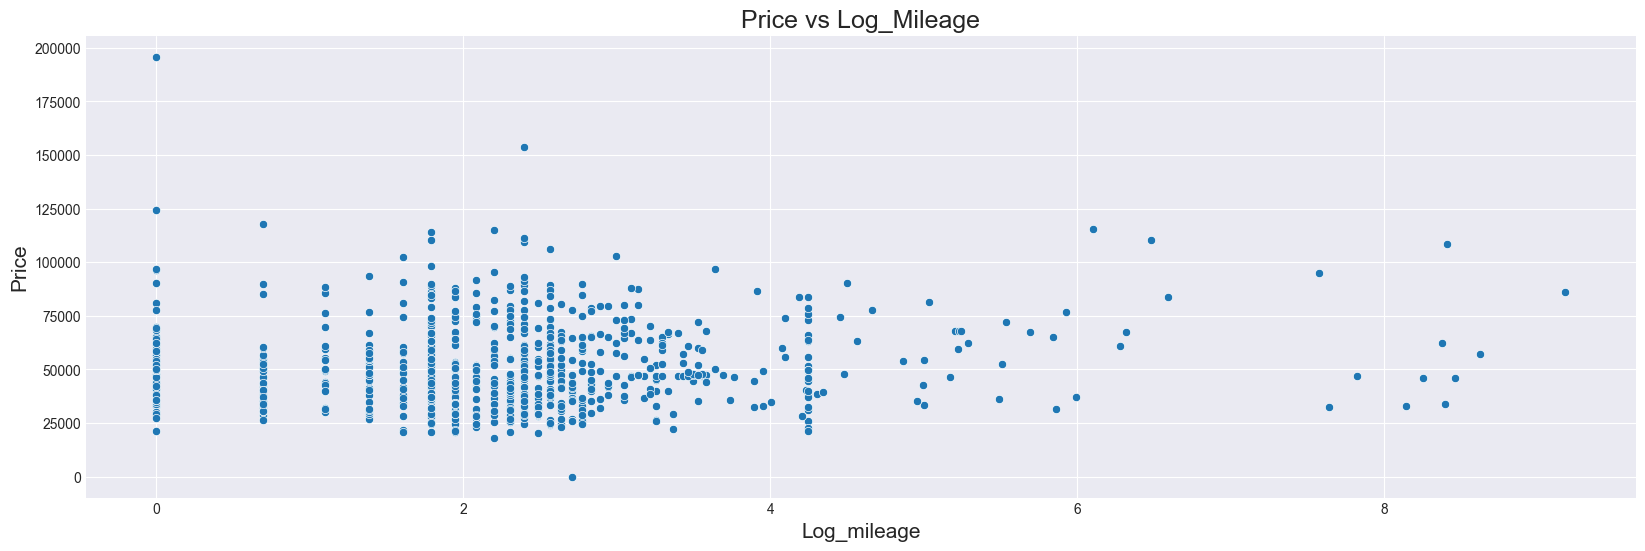

In [32]:
# Log transform on mileage
df["log_mileage"] = np.log1p(df["mileage"])
print(f"Log_mileage correlation with Price: {df["price"].corr(df["log_mileage"])}")
print("")
plt.figure(figsize=(20,6))
sns.scatterplot(data=df, x="log_mileage", y="price")
plt.title("Price vs Log_Mileage", size=18)
plt.xlabel("Log_mileage", size=15)
plt.ylabel("Price", size=15)

plt.show()

### Insights

For Categorical columns
* All columns except possibly `doors` have extremely small p_values, suggesting they are statistically significant predictors of price.
* Top contributors by F_stats are `drivetrain`, `model`, `fuel`, and `make`.
* `Doors` might be less impactful to our model than others.


For Numerical column
* `year` essentially has no correlation with `price` in the dataset.
* `cylinders` has moderate positive correlation of value `0.426` with `price`
* `Mileage` has very weak correlation with `price`
* Despite the log transformation of mileage, the correlation with price is still very weak.

## Feature Engineering

In [33]:
# derive car age
from datetime import datetime
current_year = datetime.now().year

#subtract year from current_year to get the age of vehicle
df["age"] = current_year - df["year"]

In [34]:
df.columns

Index(['make', 'model', 'year', 'price', 'cylinders', 'fuel', 'mileage',
       'transmission', 'trim', 'body', 'doors', 'exterior_color',
       'interior_color', 'drivetrain', 'log_mileage', 'age'],
      dtype='object')

In [35]:
# select features for prediction
df.drop(columns=["year", "mileage", "doors", "log_mileage"], inplace=True)

# define input feature and target varaible
X = df.drop("price", axis=1)
y = df["price"]

X.columns

Index(['make', 'model', 'cylinders', 'fuel', 'transmission', 'trim', 'body',
       'exterior_color', 'interior_color', 'drivetrain', 'age'],
      dtype='object')

# Model Development

In [36]:
# split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


cat_col = X_train.select_dtypes(include="object").columns
num_col = X_train.select_dtypes(include="number").columns


# transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# apply different transformers to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_col),
        ("cat", categorical_transformer, cat_col)
    ],
    remainder="passthrough"  # keep other column if any
)

In [37]:
# list to store our model evaluation values
model_result = []

# Baseline Model
# using mean as the predicted value and evaluate
y_pred_baseline = np.full_like(y_val, y_train.mean(), dtype="float64")
baseline_MSE = mean_squared_error(y_val, y_pred_baseline)
baseline_r2 = r2_score(y_val, y_pred_baseline)

model_result.append({
    "Model": "Baseline (Mean)",
    "MSE": baseline_MSE,
    "R2": baseline_r2
})

In [38]:
# Models to use
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "SGD": SGDRegressor(max_iter=6000, random_state=42)
}

In [39]:
# loop through each model
for name, model in models.items():
    pipeline = Pipeline([
        ("Preprocessing", preprocessor),
        ("Regressor", model)
    ])

    # fit model
    pipeline.fit(X_train, y_train)

    # predict
    y_pred = pipeline.predict(X_val)

    # Evaluate
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    model_result.append({
        "Model": name,
        "MSE": mse,
        "R2": r2
    })

In [40]:
# create dataframe
models_df = pd.DataFrame(model_result)

models_df

,Model,MSE,R2
0,Baseline (Mean),4.936284e+08,-0.014169
1,Linear Regression,8.213525e+07,0.831252
2,Ridge,8.251280e+07,0.830476
3,SGD,8.171946e+07,0.832106


The Ridge Regression and Stochastic Gradient Descent models performed much better. 

Hyperparameter tuning and cross validation will be carried out on both models

## Hyperparameter Tuning and Cross Validation

In [41]:
chosen_models = {
    "Ridge": Ridge(random_state=42),
    "SGDRegressor": SGDRegressor(random_state=42)
}

# preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

# parameter grids for hyperparameter tuning
param_grids = {
    "Ridge": {
        "alpha": [0.1, 1.0, 10.0, 100.0]
    },
    "SGDRegressor": {
        "max_iter": [8000, 10000, 15000],
        "alpha": [0.0001, 0.001, 0.01],
        "penalty": ["l2", "elasticnet"],
         "learning_rate": ["constant", "adaptive"],
        "eta0": [0.01, 0.1],
        "loss": ["squared_error", "huber"]
    }
}

In [42]:
tuned_results = {}
best_params = {}

for name, model in chosen_models.items():
    print(f"Tuning hyperparameter for {name}")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_processed, y_train)

    best_model = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_
    best_score = -grid_search.best_score_ # Convert to positive MSE

    print(f"Best parameters for {name}: {best_params[name]}")
    print(f"Best cross-validation MSE for {name}: {best_score:.2f}")

    # Evaluate the best model on the test set
    y_pred_tuned = best_model.predict(X_val_processed)
    mse_tuned = mean_squared_error(y_val, y_pred_tuned)
    r2_tuned = r2_score(y_val, y_pred_tuned)

    tuned_results[name] = {"MSE": mse_tuned, "R2": r2_tuned}
    print(f"Tuned {name} - Test MSE: {mse_tuned:.2f}, Test R2: {r2_tuned:.2f}")
    print("")

Tuning hyperparameter for Ridge
Best parameters for Ridge: {'alpha': 0.1}
Best cross-validation MSE for Ridge: 61723523.08
Tuned Ridge - Test MSE: 78452834.45, Test R2: 0.84

Tuning hyperparameter for SGDRegressor
Best parameters for SGDRegressor: {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'loss': 'squared_error', 'max_iter': 8000, 'penalty': 'l2'}
Best cross-validation MSE for SGDRegressor: 66766666.37
Tuned SGDRegressor - Test MSE: 82147742.43, Test R2: 0.83



C:\Users\George\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Model Evaluation and Selection

In [43]:
display(tuned_results)
print("")
display(best_params)

{'Ridge': {'MSE': 78452834.45164017, 'R2': 0.838817186969637},
 'SGDRegressor': {'MSE': 82147742.4311048, 'R2': 0.831225929544954}}

{'Ridge': {'alpha': 0.1},
 'SGDRegressor': {'alpha': 0.0001,
  'eta0': 0.1,
  'learning_rate': 'adaptive',
  'loss': 'squared_error',
  'max_iter': 8000,
  'penalty': 'l2'}}

In [44]:
# Compare both models best evaluation metrics and hyperparameters
print(f"Tuned Model Comparison Result")
for name, metrics in tuned_results.items():
    print(f"{name}: Test MSE = {metrics["MSE"]:.2f}, Test R2 = {metrics["R2"]:.2f}")

print("")
print(f"Best Hyperparameter found")
for name, params in best_params.items():
    print(f"{name}: Best parameter = {params}")

Tuned Model Comparison Result
Ridge: Test MSE = 78452834.45, Test R2 = 0.84
SGDRegressor: Test MSE = 82147742.43, Test R2 = 0.83

Best Hyperparameter found
Ridge: Best parameter = {'alpha': 0.1}
SGDRegressor: Best parameter = {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'loss': 'squared_error', 'max_iter': 8000, 'penalty': 'l2'}


### Best Model 
Ridge with `alpha value : 0.1`

## Error Analysis

In [45]:
# Re-run model best model with best hyperparameter
ridge_model = Ridge(alpha=0.1, random_state=42, )

# fit model on test data
ridge_model.fit(X_train_processed, y_train)

# make prediction
y_hat = ridge_model.predict(X_val_processed)

# calculate residual
residual = y_val - y_hat

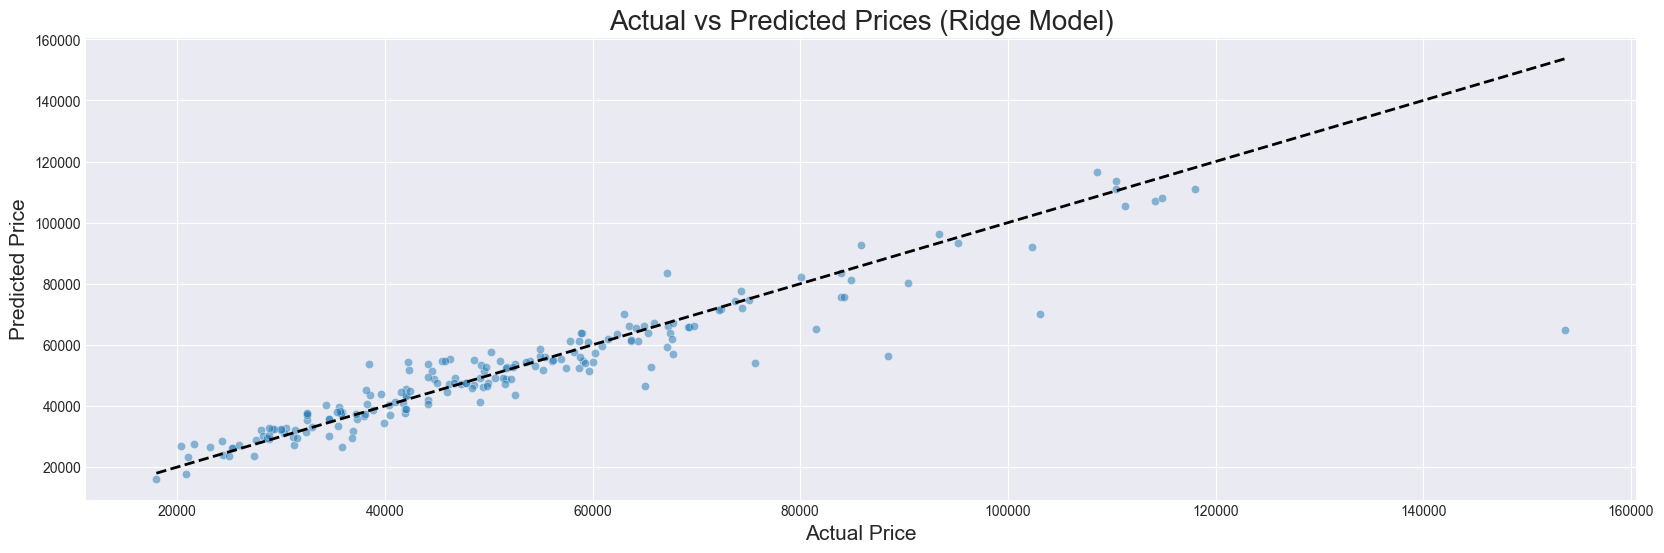

In [46]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=y_val, y=y_hat, alpha=0.5)
plt.title("Actual vs Predicted Prices (Ridge Model)", size=20)
plt.xlabel("Actual Price", size=15)
plt.ylabel("Predicted Price", size=15)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2) # Diagonal line for reference

plt.show()

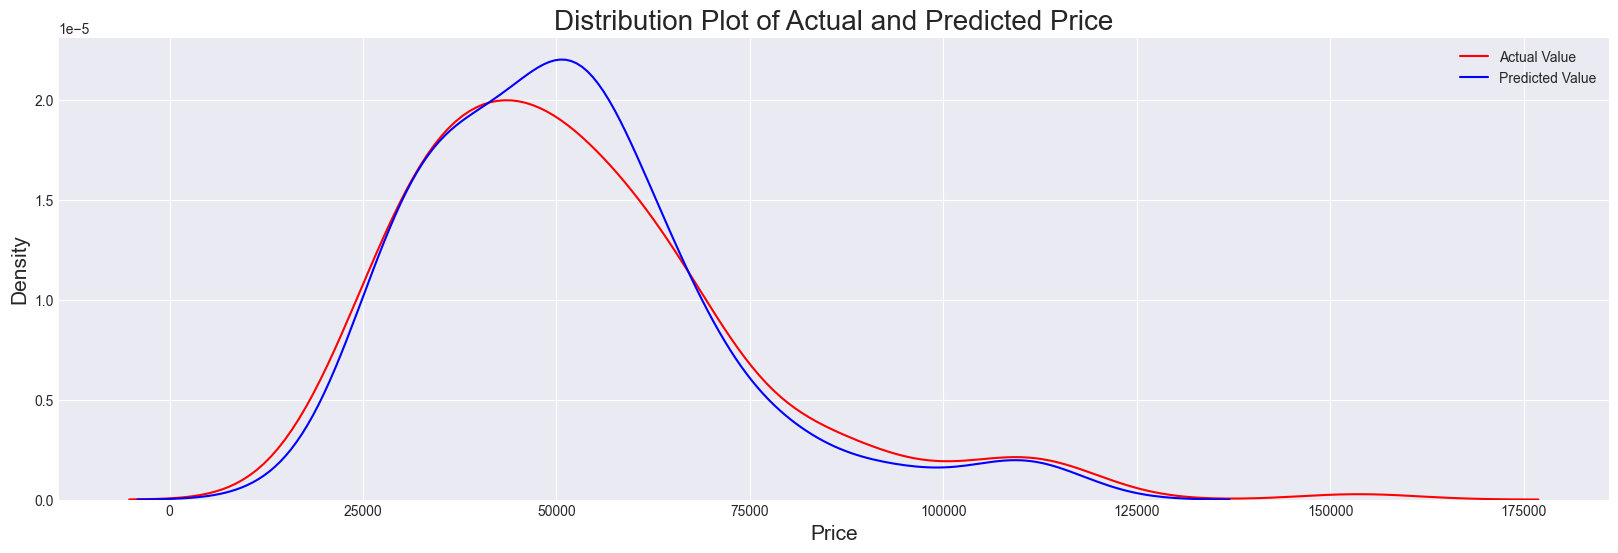

In [47]:
# Distplot of actual and predicted price
plt.figure(figsize=(20, 6))
axs_1 = sns.kdeplot(y_val, color="red", label="Actual Value")
sns.kdeplot(y_hat, color="blue", label="Predicted Value", ax=axs_1)
plt.title("Distribution Plot of Actual and Predicted Price", size=20)
plt.xlabel("Price", size=15)
plt.ylabel("Density", size=15)
plt.legend()

plt.show()

### Insights
* The model predictions closely resemble the actual values, suggesting a well-fitted model.
* The model slightly overpredicts in the lower-middle price range (~45,000–60,000).
* It may underpredict prices slightly in the higher range (~100,000+), as the red line is slightly higher than the blue there.

## Model Interpretability

In [48]:
# intercept and coefficients of the model
intercept = ridge_model.intercept_
coefficients = ridge_model.coef_

# features names from the Column transformer object
feature_names = preprocessor.get_feature_names_out()

# Dataframe to for features and their coefficients
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

# sort values by the absolute magnitude of their coefficient
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
sorted_coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

In [49]:
print(f"Model Intercept: {intercept}")
print("")
# Display the Top 10 features with largest positive and negative coefficient
print("Top 10 Feature with Largest Positive Coefficient")
display(sorted_coef_df[sorted_coef_df["Coefficient"] > 0].head(10))
print("")
print("Top 10 Features with Largest Negative Coefficient")
display(sorted_coef_df[sorted_coef_df["Coefficient"] < 0].head(10))

Model Intercept: 57258.31669740491

Top 10 Feature with Largest Positive Coefficient


,Feature,Coefficient,Abs_Coefficient
83,cat__model_Grand Wagoneer,32543.660431,32543.660431
658,cat__interior_color_Caramel,31321.026718,31321.026718
308,cat__trim_M70,31321.026718,31321.026718
172,cat__model_i7,31321.026718,31321.026718
4,cat__make_BMW,24975.822380,24975.822380
359,cat__trim_Series III,23256.136227,23256.136227
70,cat__model_Expedition,21761.982098,21761.982098
395,cat__trim_ZR2,19644.350119,19644.350119
23,cat__make_Mercedes-Benz,19110.753883,19110.753883
311,cat__trim_Overland,16307.981176,16307.981176



Top 10 Features with Largest Negative Coefficient


,Feature,Coefficient,Abs_Coefficient
124,cat__model_SQ5,-28144.377124,28144.377124
629,cat__exterior_color_Ultra Blue Metallic,-28144.377124,28144.377124
49,cat__model_Compass,-18117.828170,18117.828170
101,cat__model_Mustang Mach-E,-16200.708474,16200.708474
24,cat__make_Nissan,-13185.544899,13185.544899
80,cat__model_Grand Cherokee,-12771.552639,12771.552639
147,cat__model_Terrain,-12711.087118,12711.087118
76,cat__model_GLA 250,-12571.592780,12571.592780
18,cat__make_Kia,-12074.722651,12074.722651
379,cat__trim_Tradesman Regular Cab 4x4 8' Box,-11315.250953,11315.250953


Interpretation of Largest Coefficients:
* Positive coefficients indicate that as the feature value increases (or as the category is present), the predicted price tends to increase.
* Negative coefficients indicate that as the feature value increases (or as the category is present), the predicted price tends to decrease.
* The magnitude of the coefficient reflects the strength of the impact on the predicted price, holding other features constant.
* For one-hot encoded categorical features (prefixed with 'cat__'), the coefficient represents the estimated change in price compared to the reference category (which is implicitly captured in the intercept or other categories).

## Specific Observations based on the model features and its coefficients

* Specific models like 'Grand Wagoneer', 'i7', 'Expendition', 'AMG GLE 53', and trims like 'M70', 'Series III' are associated with significantly higher predicted prices.
* The 'BMW' make has a strong positive coefficient, suggesting that BMW vehicles are generally predicted to be more expensive compared to other makes (relative to the baseline/average make).
* A specific interior color 'Caramel' is also associated with a much higher predicted price, likely indicative of luxury interior packages.
* Specific models like 'SQ5', 'Compass', 'Mustang Mach-E', and 'Grand Cherokee' have negative coefficients, suggesting they are predicted to be less expensive compared to other models (relative to the baseline/average model).
* Certain makes like 'Nissan', and 'Kia' have notable negative coefficients, indicating that vehicles from these manufacturers are generally predicted to be less expensive compared to others.
* The 'Tradesman Regular Cab 4x4 8' Box' trim has a significant negative coefficient, which is consistent with it typically being a lower, more utilitarian trim level.
* The exterior color 'Ultra Blue Metallic' is associated with a significantly lower predicted price. This could be an outlier or correlated with less expensive models/trims where this color is available.